In [37]:
import os
import pandas as pd
from newsapi import NewsApiClient
%matplotlib inline

In [38]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [39]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [40]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [41]:
# Fetch the Bitcoin news articles
bitcoin_news=newsapi.get_everything(q="bitcoin",language="en",sort_by="relevancy")

print(f"Total articles about bitcoin: {bitcoin_news['totalResults']}")

bitcoin_news["articles"][0]

Total articles about bitcoin: 4409


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [42]:
# Fetch the Ethereum news articles
ethereum_news=newsapi.get_everything(q='ethereum',language='en',sort_by="relevancy")
print(f"Total articles about ethereum: {ethereum_news['totalResults']}")
ethereum_news["articles"][0]

Total articles about ethereum: 925


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'Sharding, scalability, decentralization – You name it, we’ve got it on the EC stage in Berlin',
 'description': 'Sharding and scalability. Transactions per second. Crypto-ecosystems. The decentralized web. These are the voyages of the Starship Blockchain, on it’s 5-year mission to seek out… Ok, you get the drift! But as you can tell, there remain many, many issues to te…',
 'url': 'http://techcrunch.com/2019/11/20/sharding-scalability-decentralization-you-name-it-weve-got-it-on-the-ec-stage-in-berlin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/11/drake-egan-tyler.jpg?w=711',
 'publishedAt': '2019-11-20T14:24:38Z',
 'content': 'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain 

In [43]:
# Function to create sentiments df
def generate_sentiments(articles):
    sentiments=[]
    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu

            })
        except AttributeError:
            pass
                
    return sentiments

In [44]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments_df=pd.DataFrame(generate_sentiments(bitcoin_news['articles']))
cols = ['Compound','Negative','Neutral','Positive','Text']
bitcoin_sentiments_df = bitcoin_sentiments_df[cols]

bitcoin_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...


In [45]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments_df=pd.DataFrame(generate_sentiments(ethereum_news['articles']))
ethereum_sentiments_df = ethereum_sentiments_df[cols]

ethereum_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
3,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...
4,-0.3818,0.066,0.934,0.000,Reuters\r\n<ul><li>Bitcoin slumped as much as ...


In [46]:
# Describe the Bitcoin Sentiment
bitcoin_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.394953,0.012789,0.922632,0.064579
std,0.244771,0.027710,0.046084,0.034369
min,-0.153100,0.000000,0.796000,0.000000
25%,0.236200,0.000000,0.916500,0.066500
50%,0.507000,0.000000,0.932000,0.067000
75%,0.507000,0.000000,0.933000,0.070500
max,0.816600,0.100000,1.000000,0.143000


In [47]:
# Describe the Ethereum Sentiment
ethereum_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.227680,0.017300,0.927750,0.055000
std,0.324937,0.031298,0.061016,0.048184
min,-0.440400,0.000000,0.738000,0.000000
25%,0.000000,0.000000,0.913000,0.000000
50%,0.296000,0.000000,0.944000,0.053500
75%,0.416450,0.013750,0.951750,0.087000
max,0.690800,0.090000,1.000000,0.173000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positive score of .065 compared to Ethereum of 0.055

Q: Which coin had the highest compound score?

A: Bitcoin had the higher compound positive score of .39 compared to Ethereum of 0.23

Q. Which coin had the highest positive score?

A: Bitcoin had the higher positive score of 1.23 compared to Ethereum of 1.1

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [48]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [49]:
# Expand the default stopwords list if necessary

In [50]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    lemmatizer = WordNetLemmatizer()
    sentence_clean=regex.sub('', text)
    words=word_tokenize(sentence_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words('english'))
    sw_addon = {'(',')',',','.','[',']',':',':','said', 'sent', 'found', 'including', 'today', 'announced', 'basically', 'also','ha'}
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens


In [51]:
# Create a new tokens column for bitcoin
bitcoin_sentiments_df['Tokens']=[tokenizer(r) for r in bitcoin_sentiments_df['Text']]
bitcoin_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive...","[whether, bitcoin, immaterial, resource, deriv..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [52]:
# Create a new tokens column for ethereum
ethereum_sentiments_df['Tokens']=[tokenizer(r) for r in ethereum_sentiments_df['Text']]
ethereum_sentiments_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...,"[sharding, scalability, transactions, per, sec..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
3,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, picking, pace, since, inception, ..."
4,-0.3818,0.066,0.934,0.000,Reuters\r\n<ul><li>Bitcoin slumped as much as ...,"[reutersullibitcoin, slumped, much, wednesday,..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [54]:
# Define bigram counter
def bigram_counter(tokens):
    
    bigram_count= dict(Counter(ngrams(tokens, n=2)))
    return pd.DataFrame(list(bigram_count.items()), columns=['bigram', 'count'])


# Generate the Bitcoin N-grams where N=2
all_bitcoin_tokens = []
for x in range(0,len(bitcoin_sentiments_df)):
    for y in bitcoin_sentiments_df['Tokens'][x]:
        all_bitcoin_tokens.append(y)
bigram_counter(all_bitcoin_tokens)

,bigram,count
0,"(less, two)",1
1,"(two, mile)",1
2,"(mile, icelands)",1
3,"(icelands, reykjavik)",1
4,"(reykjavik, airport)",1
...,...,...
211,"(fight, power)",1
212,"(power, char)",1
213,"(say, crack)",1
214,"(crack, open)",1


In [55]:
# Generate the Ethereum N-grams where N=2

all_ethereum_tokens = []
for x in range(0,len(ethereum_sentiments_df)):
    for y in ethereum_sentiments_df['Tokens'][x]:
        all_ethereum_tokens.append(y)
bigram_counter(all_ethereum_tokens)

,bigram,count
0,"(sharding, scalability)",2
1,"(scalability, transactions)",2
2,"(transactions, per)",2
3,"(per, secondcryptoecosystems)",2
4,"(secondcryptoecosystems, thedecentralized)",2
...,...,...
454,"(technology, unlike)",1
455,"(unlike, parent)",1
456,"(parent, technologyblockchain)",1
457,"(technologyblockchain, cryptoc)",1


In [56]:
# Use the token_count function to generate the top 10 words from each coin
# def token_count(tokens, N=10):
#     """Returns the top N tokens from the frequency count"""
#     return Counter(tokens).most_common(N)


# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    bigrams = ngrams(tokens,n=1)
    top_10 = dict(Counter(bigrams).most_common(N))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [57]:
# Get the top 10 words for Bitcoin
bitcoin_top_10=token_count(all_bitcoin_tokens)
bitcoin_top_10

,bigram,count
0,"(bitcoin,)",46
1,"(satoshi,)",28
2,"(nakaboto,)",28
3,"(char,)",19
4,"(robot,)",14
5,"(colleague,)",14
6,"(writes,)",14
7,"(every,)",14
8,"(fucking,)",14
9,"(daywelcome,)",14


In [58]:
# Get the top 10 words for Ethereum
ethereum_top_10=token_count(all_ethereum_tokens)
ethereum_top_10

,bigram,count
0,"(char,)",20
1,"(cryptocurrency,)",11
2,"(blockchain,)",7
3,"(xrp,)",7
4,"(many,)",5
5,"(bitcoin,)",5
6,"(bank,)",5
7,"(year,)",4
8,"(ethereum,)",4
9,"(get,)",3


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15.0, 10.0]

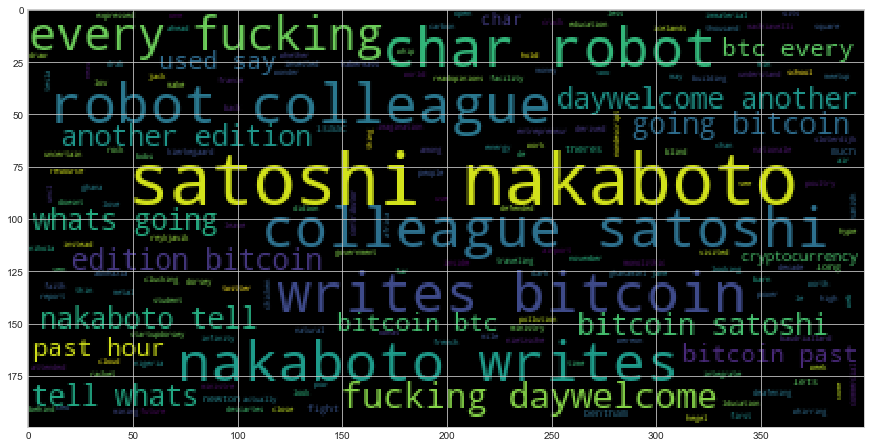

In [60]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(all_bitcoin_tokens))
plt.imshow(wc)

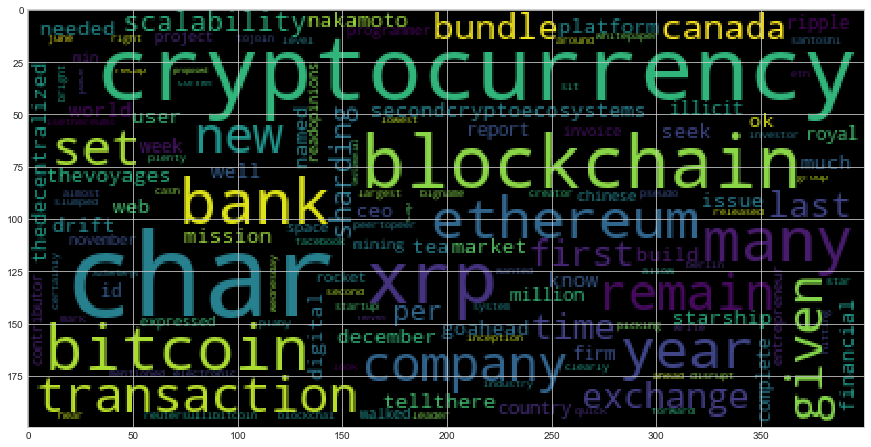

In [61]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(all_ethereum_tokens))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
big_text=bitcoin_sentiments_df.Text.sum()
big_text

'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]Whether Bitcoin, an immaterial resource derived from hype and blind faith, will vanish into thin air is uncertain, but it will leave behind a dark cloud of carbon pollution. Cryptocurrency mining facilities use so much energy that the government of Abkhazia c… [+3402 chars]High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars]Our robot colleague Satoshi Nakaboto writes about Bitcoin every fucking day.\r\nWelcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been goi

In [30]:
# Run the NER processor on all of the text
doc = nlp(big_text)
# Add a title to the document

In [104]:
# Render the visualization
displacy.render(doc, style='ent')

In [31]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Less than two miles QUANTITY
Icelands Reykjavik FAC
tens of thousands CARDINAL
Abkhazia c ORG
France GPE
first ORDINAL
French NORP
Le Ministère de lÉducation Nationale ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Baudriallard PERSON
only one CARDINAL
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Machiavelli PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Nietzsche PERSON
Time ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Isaac Newton PERSON
Jack Dorsey PERSON
Bitcoin GPE
Ghana GPE
just weeks DATE
Dorsey PERSON
Bitcoin GPE
Africa LOC
Nigeria GPE
Ghana GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
the past 24 hours TIME
Sloterdijk PERSON
S

---

## Ethereum NER

In [32]:
# Concatenate all of the bitcoin text together
big_text=ethereum_sentiments_df.Text.sum()
big_text

"Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain many, many issues to tea… [+3851 chars]Disrupt Berlin is right around the corner. And there is plenty to look forward to.\r\nJoin us December 11 and December 12 to hear from industry leaders, investors, and bright stars in the startup world. We’ll sit down with CEOs from big-name companies such as A… [+14834 chars]he plaBy now, you should almost certainly know about Ethereum, ETH the second largest cryptocurrency by market cap. But if you needed a quick recap, here it is.\r\nEthereums creators wanted to build a platform that would allow users all over the world to write … [+7608 chars]Blockchain has been picking up the pace since its inception in the year 2009 by a pseudo group named as Santoshi Nakamoto. Nakamoto has released a whitepaper

In [33]:
# Run the NER processor on all of the text

doc = nlp(big_text)

In [34]:
# Render the visualization

displacy.render(doc, style='ent')

In [35]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

second ORDINAL
the Starship Blockchain LOC
Berlin PERSON
December 11 and December 12 DATE
ETH ORG
second ORDINAL
the year 2009 DATE
Santoshi Nakamoto PERSON
Nakamoto ORG
Bitcoin PERSON
Blockchai GPE
Bitcoin GPE
as much as 9% PERCENT
Wednesday DATE
June DATE
Facebook ORG
Mark Zuckerberg's PERSON
Libra GPE
Zuckerberg PERSON
chars]A Swiss bank ORG
Swiss NORP
Block PERSON
$400 million MONEY
Ripple XRP PERSON
XRP ORG
Ponzi PERSON
XRP ORG
London GPE
less than 0.2 percent PERCENT
XRP ORG
chars]The Royal Bank of Canada ORG
Last week DATE
Canadian NORP
The Logic WORK_OF_ART
The Royal Bank of Canada ORG
the day DATE
six CARDINAL
Bitcoin GPE
XRP PERSON
third ORDINAL
Wilson PERSON
Bitcoin BTC ORG
the Mona Foundation ORG
Blockchain GPE
Bitcoin GPE
the Complete Blockchain and Ethereum Programmer Bundle ORG
just $29 MONEY
Bejing ORG
first ORDINAL
public last week DATE
Chinese NORP
2021 DATE
last year DATE
Chinese NORP
Tencent LOC
blockchain GPE
Framework of DL PERSON
20, 2019 DATE
4 min MONEY
Crypto 